## <font color='indigo'> Проект по маркетингу развлекательного приложения Procrastinate Pro+ </font>

### <font color='green'>Получение данных, просмотр и обработка:</font>

<font color='navy'> - Просмотр входных данных и работа с ними: форматирование заголовков таболиц, работа с форматами данных.

### <font color='green'>Вопросы исследования</font>

<font color='navy'> - откуда приходят пользователи и какими устройствами они пользуются \
    - сколько стоит привлечение пользователей из различных рекламных каналов; \
    - сколько денег приносит каждый клиент, \
    - когда расходы на привлечение клиента окупаются, \
    - какие факторы мешают привлечению клиентов.
</font>

### <font color='green'>Результаты исследования</font>

<font color='navy'> - Выводы\
    - Рекомендации </font>

Импортируем все библиотеки для работы

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


Выгружаем данные

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except: 
    visits = pd.read_csv('/Users/temp/Desktop/projects/visits_info_short.csv')
    orders = pd.read_csv('/Users/temp/Desktop/projects/orders_info_short.csv')
    costs = pd.read_csv('/Users/temp/Desktop/projects/costs_info_short.csv')

Теперь посмотрим на данные в каждой таблице

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Изменим названия столбцов для удобной работы

In [4]:
visits = visits.rename({'User Id': 'user_id', 'Region': 'region', 'Device':'device', 'Channel':'channel',
                        'Session Start': 'session_start', 'Session End': 'session_end'}, axis='columns')

In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Необходимо изменить формат даты с object на datetime

In [6]:
visits['session_start'] = pd.to_datetime(
    visits['session_start'], format='%Y-%m-%d %H:%M:%S'
)


In [7]:
visits['session_end'] = pd.to_datetime(
    visits['session_end'], format='%Y-%m-%d %H:%M:%S'
)

In [8]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


Теперь с датой в таблице visits всё в порядке

In [9]:
orders.head()


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [10]:
orders = orders.rename({'User Id': 'user_id', 'Event Dt':'event_dt', 'Revenue':'revenue'}, axis='columns')

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Та же проблема с датой, переведем ее в формат datetime

In [12]:
orders['event_dt'] = pd.to_datetime(
    orders['event_dt'], format='%Y-%m-%d %H:%M:%S'
)

In [13]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [14]:
costs = costs.rename({'dt': 'dt', 'Channel':'channel', 'costs':'costs'}, axis='columns')

In [15]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [16]:
costs['dt'] = pd.to_datetime(
    costs['dt'], format='%Y-%m-%d %H:%M:%S'
)

In [17]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


### Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей

Используем функцию для опредедения профиля пользователя

In [18]:
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    costs['dt'] = pd.to_datetime(costs['dt']).dt.date # так как была ошибка при соединении
    # то надо было изменить тип данных и после чего уже находим параметры первых посещений

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Зададим дату и горизонт анализа. Несмотря на то, что в заказе написано 1 ноября, но по данным максимальная дата это 27 октября, поэтому используем ее. По заданию заказчика пользователи должны "прожить" 2 недели. 

In [19]:
observation_date = datetime(2019, 10, 27).date()
analysis_horizon = 14

In [20]:
profiles = get_profiles(visits, orders, costs)

In [70]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Таким образом были созданы профили пользователей. 

#### Определите минимальную и максимальную даты привлечения пользователей.

In [22]:
profiles['dt'].min()

datetime.date(2019, 5, 1)

Минимальная дата привлечения - 1 мая 2019 года

In [23]:
profiles['dt'].max()

datetime.date(2019, 10, 27)

Максимальная дата привлечения - 27 октября 2019 года

### Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. 

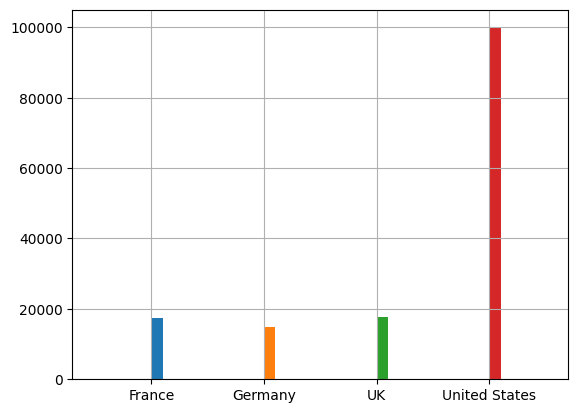

In [24]:
profiles.groupby('region')['region'].hist()
plt.show()

Можем найти доли приходящих пользователей по странам

Считаем всех

In [76]:
sum_users = profiles['user_id'].count()
sum_users

150008

Считаем доли

In [77]:
counted_users = profiles.groupby('region')['region'].count()/sum_users

In [78]:
counted_users

region
France           0.116327
Germany          0.099868
UK               0.117160
United States    0.666644
Name: region, dtype: float64

Приходят больше всего из США - 66,66%, из Великобритании - 11,7%, из Франции = 11,6%, а меньше всего из Германии - 9,98%.

Посмотрим, что с платящими пользователями

In [82]:
payer_users = profiles[profiles['payer'] == True].groupby(
    'region')['region']

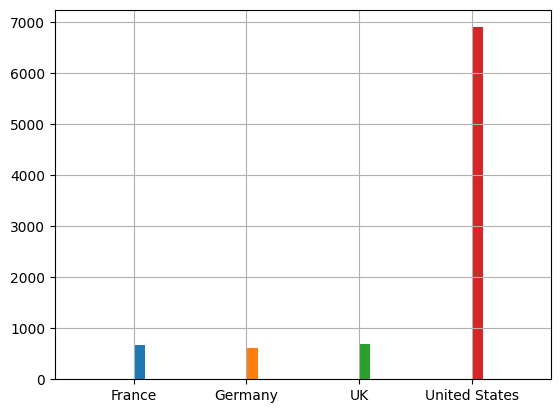

In [83]:
payer_users.hist()
plt.show()

In [88]:
sum_payers = profiles[profiles['payer'] == True]['user_id'].count()
sum_payers

8881

In [89]:
count_payers = payer_users.count() / sum_payers
count_payers

region
France           0.074654
Germany          0.069362
UK               0.078820
United States    0.777165
Name: region, dtype: float64

Больше всего платящих пользователей тоже в США - 77,7%, в Великобритании 7,88%, во Франции 7,4%, а в Германии 6,9%.

### Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [26]:
payer_in_regoin = profiles.pivot_table(index = 'region', values = 'payer', aggfunc = ['count', 'sum'])
payer_in_regoin.columns = ['users', 'payer']
payer_in_regoin ['rate'] = payer_in_regoin ['payer']/ payer_in_regoin ['users']
payer_in_regoin

,users,payer,rate
region,,,
France,17450,663,0.037994
Germany,14981,616,0.041119
UK,17575,700,0.039829
United States,100002,6902,0.069019


Доля платящих в США около 7%, в Германии чуть больше 4%, в Великобритании 3,9%, а в Франции меньше всех - 3,7%

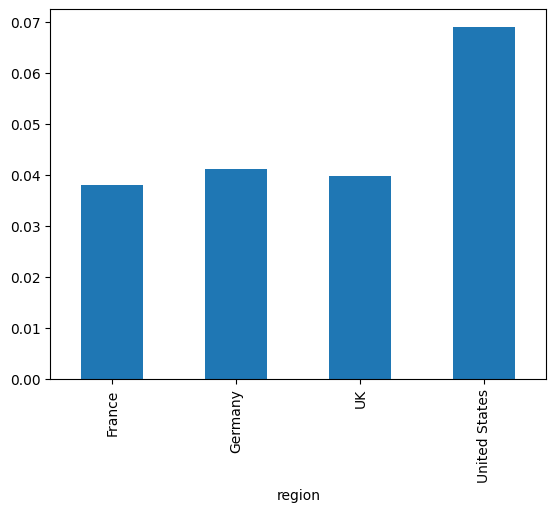

In [27]:
payer_in_regoin['rate'].plot(kind = 'bar')
plt.show()

### Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

In [28]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


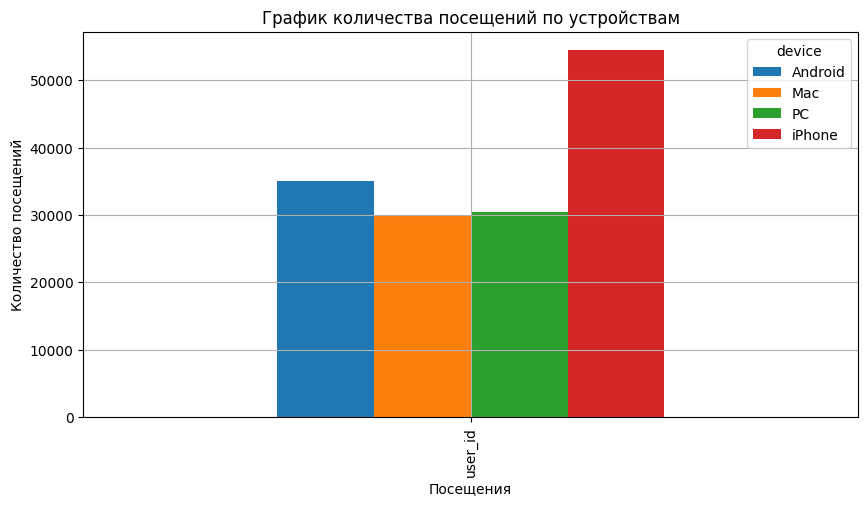

In [29]:
device_plot = profiles.pivot_table(columns='device', values='user_id', aggfunc='nunique').plot(
    grid=True, kind = 'bar', figsize=(10, 5))
plt.xlabel('Посещения')
plt.ylabel('Количество посещений')
plt.title('График количества посещений по устройствам')
plt.show()

Больше всего пользователей предпочитают заходить через устойство iPhone

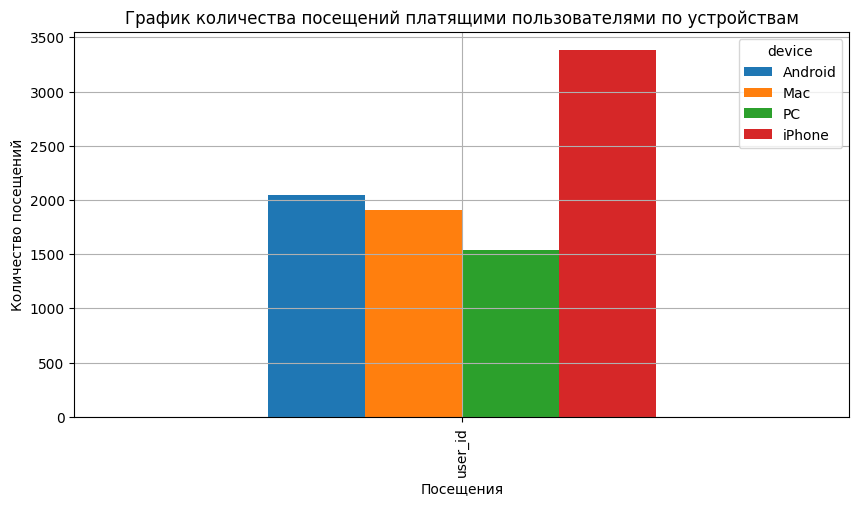

In [30]:
device_plot = profiles[profiles['payer'] == True].pivot_table(columns='device', values='user_id', aggfunc='nunique').plot(
    grid=True, kind = 'bar', figsize=(10, 5))
plt.xlabel('Посещения')
plt.ylabel('Количество посещений')
plt.title('График количества посещений платящими пользователями по устройствам')
plt.show()

По количеству привлеченных платящих пользователей лидирует айфон, а на втором месте андроид - то есть платящие клиенты чаще заходят через мобильное устойство. Но важно понять, может быть люди просто чаще пользуется тем или иным устойством. Для корректности, рассчитаем долю платящих по каждому устойству из всех пользователей этих устройств. 

In [99]:
num_device = profiles.pivot_table(
    columns='device', values='user_id', aggfunc='nunique')

In [100]:
num_pay_device = profiles[profiles['payer'] == True].pivot_table(
    columns='device', values='user_id', aggfunc='nunique')

In [101]:
rate_device = num_pay_device / num_device 

In [106]:
rate_device*100

device,Android,Mac,PC,iPhone
user_id,5.851793,6.364423,5.04679,6.207897


<AxesSubplot:>

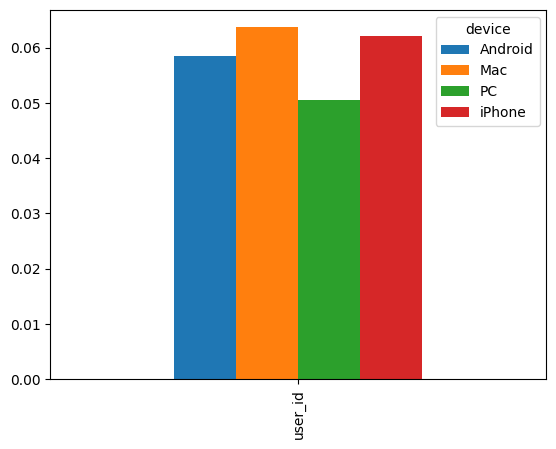

In [104]:
rate_device.plot(kind = 'bar')

Доля платящих по устройствам дает более корректный результат для анализа. Мы видим, что платящие клиенты - чаще всего пользователи техники Apple - либо iPhone, либо Mac. Меньшая доля приходится на пользователей ПК.
Доля платящих пользователей Мас равна 6,3%, доля iPhone равна 6,2%, доля Android равна 5,9%, а у ПК всего 5%.

### Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [31]:
per_payer_dev = profiles.pivot_table(index='device',columns = 'payer', values='user_id', aggfunc='nunique')
per_payer_dev.columns = ['not_payer', 'payer']
per_payer_dev['rate_of_payer'] = per_payer_dev ['payer'] / (per_payer_dev ['not_payer'] +
                                                            per_payer_dev ['payer']) 
per_payer_dev['count_of_users'] = per_payer_dev ['not_payer'] + per_payer_dev ['payer']
per_payer_dev_new = per_payer_dev[['count_of_users', 'rate_of_payer']]
per_payer_dev_new

,count_of_users,rate_of_payer
device,,
Android,35032,0.058518
Mac,30042,0.063644
PC,30455,0.050468
iPhone,54479,0.062079


Как мы видим, пользователи, которые пользуются системой мак и айфонами платят чаще, чем пользователи андроида и ПК

### Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. 

In [32]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Изучим рекламные источники привлечения клиентов

In [33]:
channels = profiles['channel'].unique()
channels

array(['FaceBoom', 'organic', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [34]:
channel_for_profiles = profiles.query('payer == True').pivot_table(index = 'channel', values = 'user_id', aggfunc = 'nunique').sort_values(
by = 'user_id', ascending = False)
channel_for_profiles

,user_id
channel,
FaceBoom,3557
TipTop,1878
organic,1160
WahooNetBanner,453
AdNonSense,440
RocketSuperAds,352
LeapBob,262
OppleCreativeMedia,233
lambdaMediaAds,225


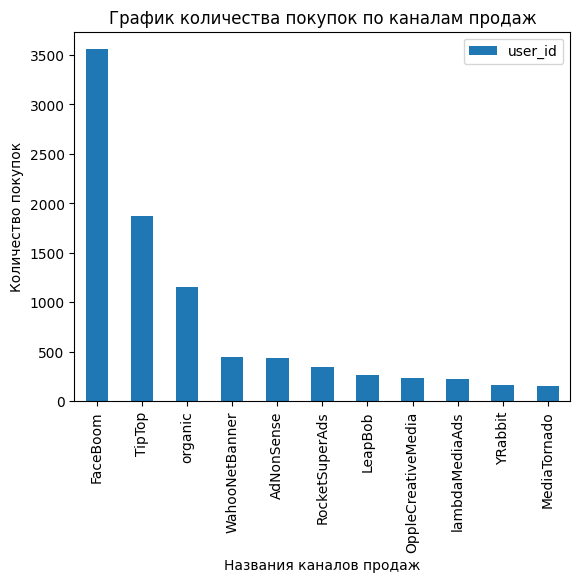

In [35]:
channel_for_profiles.plot(kind = 'bar')
plt.xlabel('Названия каналов продаж')
plt.ylabel('Количество покупок')
plt.title('График количества покупок по каналам продаж')
plt.show()

Наиболее популярной платформой для привлечения клиентов, которые совершают покупки, является FaceBoom, а на втором месте идет TipTop

### Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [36]:
channels = profiles.pivot_table(index = 'channel', values = 'user_id', aggfunc = 'nunique').sort_values(
by = 'user_id', ascending = False)
channels

,user_id
channel,
organic,56439
FaceBoom,29144
TipTop,19561
OppleCreativeMedia,8605
LeapBob,8553
WahooNetBanner,8553
RocketSuperAds,4448
MediaTornado,4364
YRabbit,4312


In [37]:
new = channel_for_profiles.merge(channels, on = 'channel')


In [38]:
new = new.rename({'user_id_x': 'payer', 'user_id_y':'total_users'}, axis='columns')

In [39]:
new['rate_of_payment'] = new['payer'] / new['total_users']

In [40]:
new = new.drop(columns = ['payer'], axis = 1)

In [41]:
new.sort_values(by = 'rate_of_payment', ascending = False)

,total_users,rate_of_payment
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


Наибольшая доля платящих пользователей приходится на канал привлечения FaceBoom, на втором месте по доле AdNonSense (но и общее число пользователей меньше), на третьем месте lambdaMediaAds, а на четвертом TipTop. При этом мы видим, что пользователи, которые были привлечены без использования различных каналов (органические) платят наименьшее число раз.

## Маркетинг

### Посчитайте общую сумму расходов на маркетинг.

Данные о расходах на маркетинг хранятся в таблице costs

In [42]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [43]:
costs['costs'].sum()

105497.30000000002

### Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [44]:
costs_by_channel = costs.groupby('channel')['costs'].sum().reset_index().sort_values(
    by = 'costs', ascending = False)
costs_by_channel

,channel,costs
6,TipTop,54751.30
1,FaceBoom,32445.60
7,WahooNetBanner,5151.00
0,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
2,LeapBob,1797.60
9,lambdaMediaAds,1557.60
3,MediaTornado,954.48
8,YRabbit,944.22


Волне логично, что на те источники, которые привлекают наибольшее количество пользователей, в том числе и платящих, тратятся большие суммы. При этом источник AdNonSense имеет достаточно небольшие затраты, но по проценту платящих пользователей из числа привлеченных он занимает второе место. Поэтому возможно стоит обратить на него внимание. 

In [45]:
costs_by_channel['in_per'] = costs_by_channel['costs'] / 105497.3 * 100

In [46]:
costs_by_channel

,channel,costs,in_per
6,TipTop,54751.30,51.898295
1,FaceBoom,32445.60,30.754910
7,WahooNetBanner,5151.00,4.882589
0,AdNonSense,3911.25,3.707441
4,OppleCreativeMedia,2151.25,2.039152
5,RocketSuperAds,1833.00,1.737485
2,LeapBob,1797.60,1.703930
9,lambdaMediaAds,1557.60,1.476436
3,MediaTornado,954.48,0.904744
8,YRabbit,944.22,0.895018


На канал привлечения TipTop уходит 51% всех средств на рекламу. Возможно стоит задумать о целесообразности таких вложений. Возможно стоит вкладываться и в другие источники, из которых приходят платящие пользователи. 

### Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.

In [47]:
costs['month'] = costs['dt'].astype('datetime64[M]').dt.date

In [48]:
costs_by_month = costs.groupby('month')['costs'].sum().reset_index()
costs_by_month

,month,costs
0,2019-05-01,9978.570
1,2019-06-01,15090.045
2,2019-07-01,16447.060
3,2019-08-01,20657.870
4,2019-09-01,22441.340
5,2019-10-01,20882.415


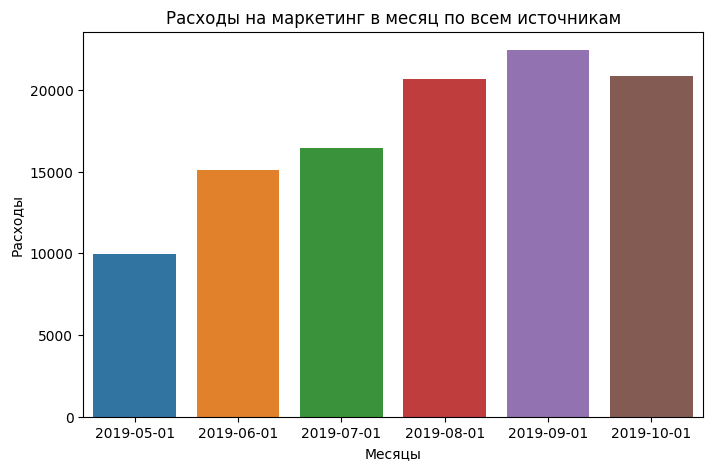

In [49]:
plt.figure(figsize = (8, 5))
ax = sns.barplot(x='month', y='costs', data=costs_by_month)
plt.title('Расходы на маркетинг в месяц по всем источникам')
ax.set_xlabel('Месяцы')
ax.set_ylabel('Расходы')
plt.show()

В сентябре были большие расходы на маркетинг, который превысили расходы в мае более чем в 2 раза. С мая наблюдался постепенные рост расходов, а после сентября расходы начали снижаться. В целом для компании целесообразно поддерживать стабильные маркетинговые расходы, а повышенные расходы должны приходится на то время, когда либо подает спрос, либо в предверье праздников или выходных для еще большого потока клиентов. 
Так как мы продвигаем и продаем приложения Procrastinate Pro+, то целесообразно поддерживать стабильный уровень рекламы целый год или хотя бы равномерно распределять спады и большие подъемы расходов от месяца к месяцу.

In [50]:
chan = costs.pivot_table(index = 'month', columns = 'channel', values = 'costs', aggfunc = 'sum')

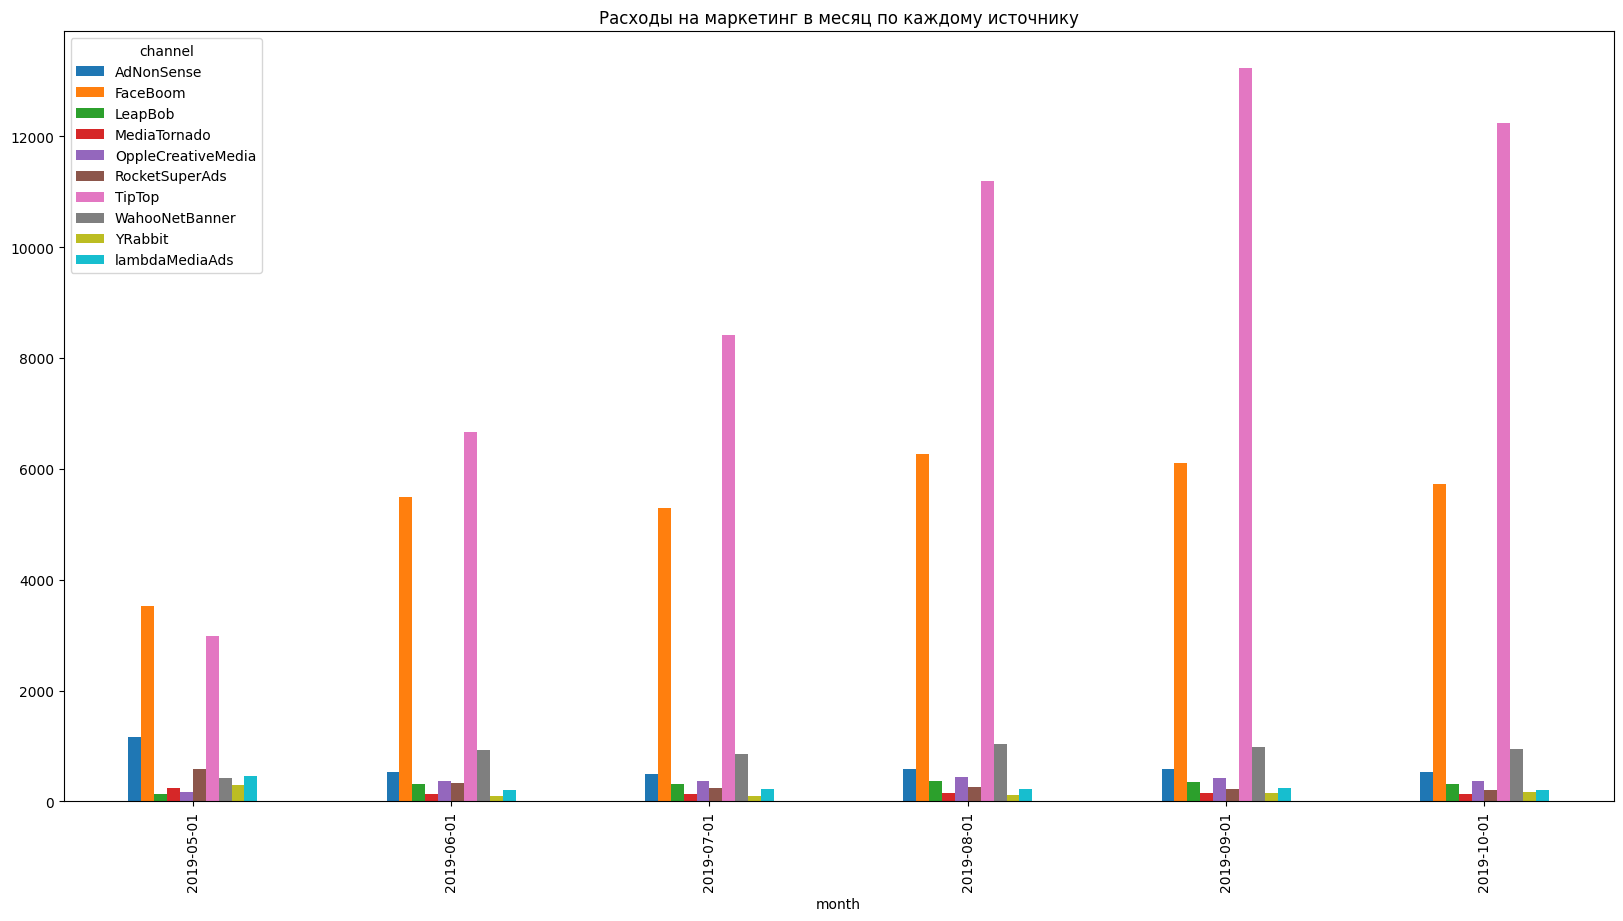

In [51]:
chan.plot(kind = 'bar', figsize = (20, 10))
plt.title('Расходы на маркетинг в месяц по каждому источнику')
ax.set_xlabel('Месяцы')
ax.set_ylabel('Расходы')
plt.show()

Сильно выбиваются два главных истоника TipTop и FaceBoom, потому что на них уходит большая часть бюджета на маркетинг. Стоит построить графики отдельно по остальным источникам, чтобы увидеть динамику. 

In [52]:
costs_without_TT_FB = costs.query('(channel != "TipTop") & (channel != "FaceBoom")')

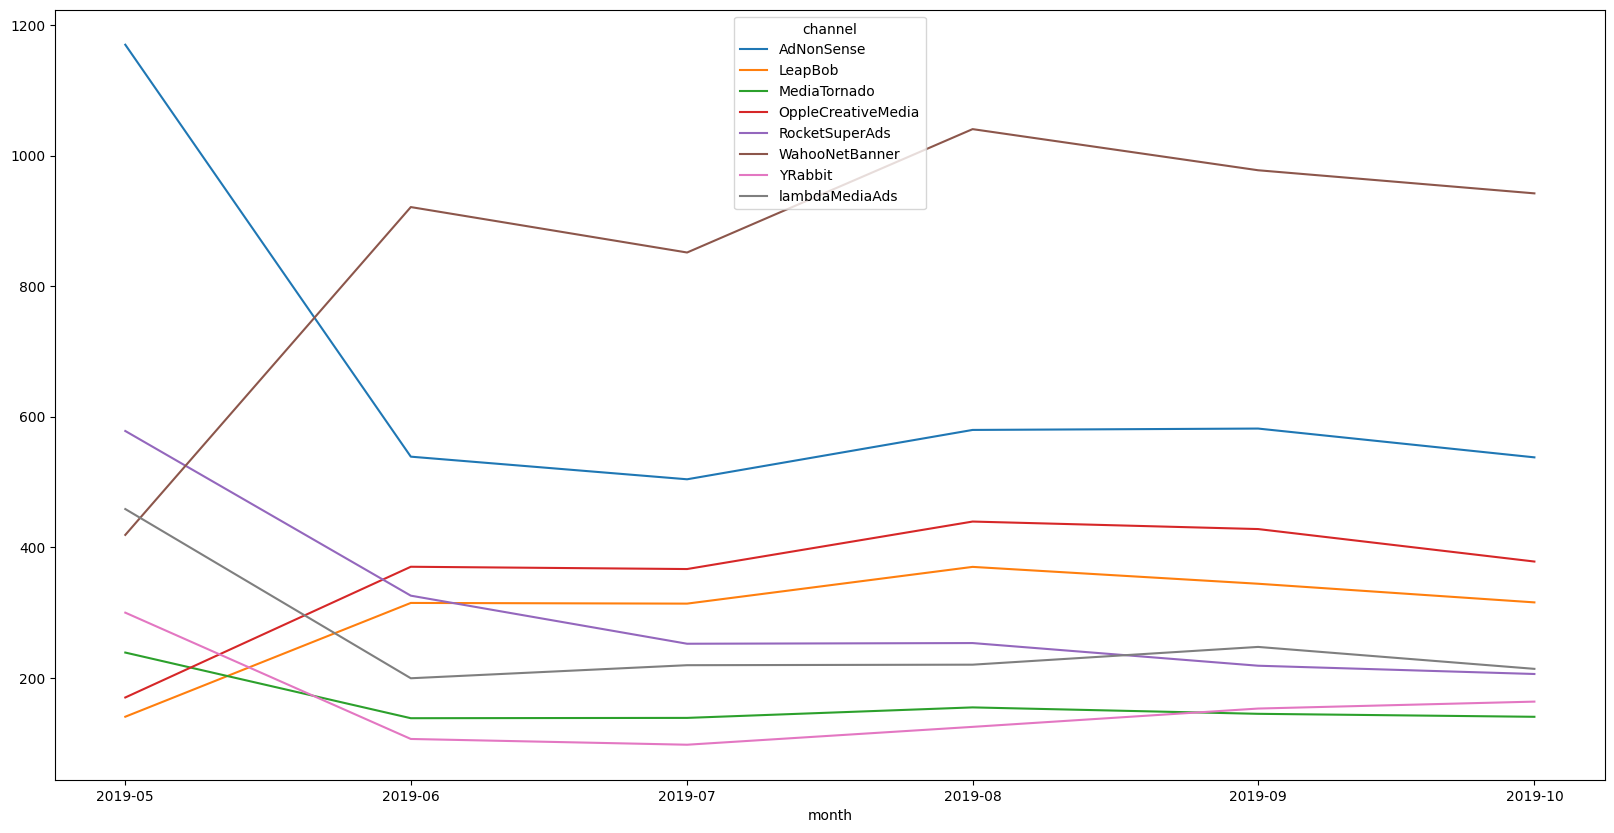

In [53]:
costs_without_TT_FB.pivot_table(index = 'month', columns = 'channel', values = 'costs', aggfunc = 'sum').plot(
figsize = (20, 10))
plt.show()

Мы видим, что по остальным источникам в целом достаточно стабильные расходы в течение месяцев. Выбивается WahooNetBanner, так как расходы на него в среднем выше и динамика данных расходов положительная. Остальные же каналы могут считаться недооценнными. 

### Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Посмотрим на то, сколько стоил каждый пользователь, который был привлечен из каждого канала. Сделаем срез по профилям пользователей, не включая органических.

In [54]:
profiles_without_organic = profiles.query('channel != "organic"').copy()

In [55]:
profiles_without_organic.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000


In [56]:
cac_channel = profiles_without_organic.pivot_table(index = 'channel', values = 'acquisition_cost', aggfunc = 'mean')
cac_channel.sort_values(by = 'acquisition_cost', ascending = False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Самыми дорогими оказись пользователи из источника TipTop. А если учесть, что на него уходит половина средств, то на это стоит обратить внимание. 

### Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

В задании сказано, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Но максимальная дата привлечения пользователей - это 27 октября - это будет наша observation_date, а горизонт анализа равен 14 дней.

Зададим дату и горизонт анализа.

In [57]:
observation_date = datetime(2019, 10, 27).date()
analysis_horizon = 14

График истории изменений CAC по каналам привлечения

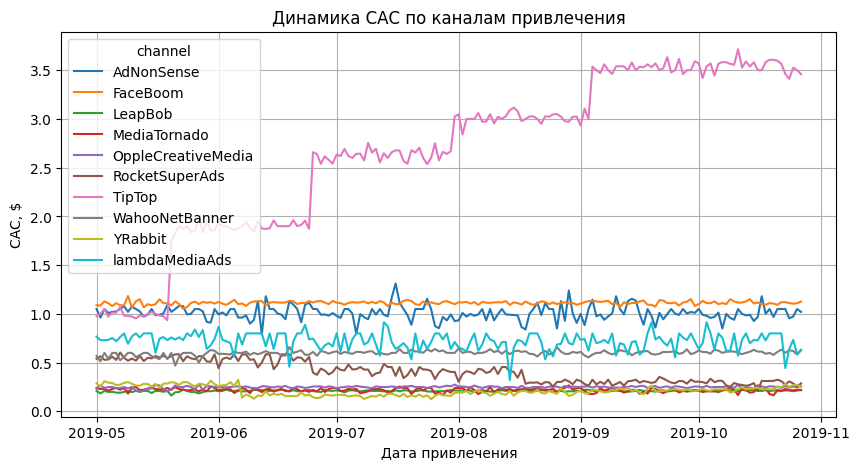

In [58]:
profiles_without_organic.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Были исключены органические пользователи, так как CAC для них равен нулю. Совокупные затраты на маркетинг и продажи, требующиеся для конвертации потенциального клиента в фактического покупателя, максимальны у канала TipTop и с каждым месяцем они только динамично растут. Остальные же каналы относительно стабильны по CAC. В очередной раз нужно задуматься, что канал TipTop служит проблемой для компании и снижает эффективность ее работы по превлечению клиентов и их окупаемости.  

LTV

In [59]:
def get_ltv(
    profiles,  # Шаг 1. Получить профили и данные о покупках
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Добавить данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        orders[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # Шаг 3. Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 4. Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 5. Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Шаг 6. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 7. Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 8. Посчитать LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу LTV
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики LTV убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
    # получаем таблицу динамики LTV
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы LTV и сырые данные
    return result_raw, result_grouped, result_in_time

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3627,0.505842,0.591701,0.646736,0.682506,0.704795,0.731219,0.753231,0.766989,0.789010,0.801392,0.804420,0.812674,0.825057,0.836071
FaceBoom,26736,0.585225,0.660526,0.699576,0.727986,0.746280,0.759719,0.774128,0.784471,0.791976,0.800413,0.805864,0.812023,0.817253,0.821359
LeapBob,7875,0.106979,0.154507,0.203931,0.233968,0.258935,0.286817,0.313557,0.333328,0.369470,0.393549,0.416996,0.437907,0.456917,0.472758
MediaTornado,4081,0.139160,0.193208,0.248478,0.296187,0.335582,0.371044,0.393053,0.422401,0.444416,0.465202,0.489659,0.511669,0.530010,0.537594
OppleCreativeMedia,7890,0.097778,0.133200,0.174574,0.209995,0.245550,0.270848,0.294882,0.314236,0.333853,0.352828,0.370663,0.383439,0.401791,0.416337
RocketSuperAds,4142,0.211828,0.324616,0.402924,0.463160,0.524363,0.577612,0.646306,0.694498,0.746564,0.797658,0.838860,0.872595,0.905365,0.941507
TipTop,17953,0.339244,0.495530,0.622461,0.738886,0.842855,0.936257,1.014870,1.098211,1.172935,1.247046,1.312756,1.372683,1.428893,1.490434
WahooNetBanner,7832,0.190400,0.291862,0.373038,0.438666,0.512196,0.565208,0.628326,0.674837,0.720333,0.761749,0.807750,0.843813,0.884594,0.914668
YRabbit,3990,0.164133,0.213160,0.255682,0.303709,0.357511,0.388777,0.416291,0.441306,0.463817,0.483827,0.505088,0.527604,0.549115,0.562872


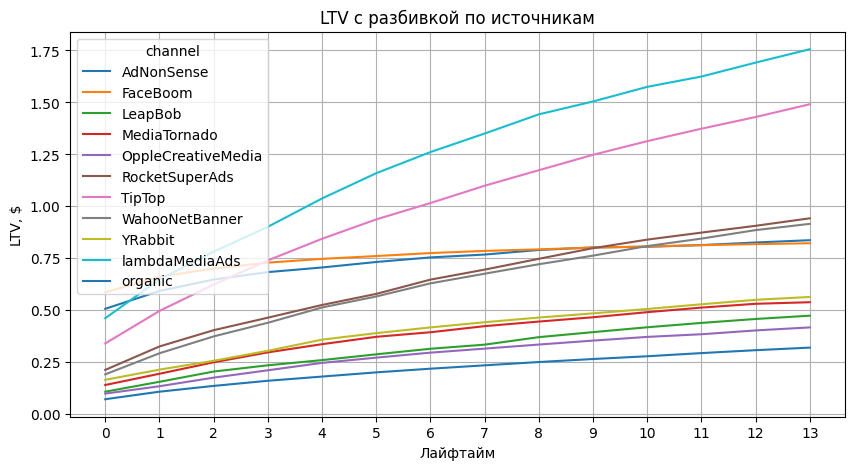

In [60]:
# находим LTV с разбивкой по каналам привлечения
ltv_raw, ltv, ltv_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=['channel']
)

# таблица LTV
display(ltv)

# кривые LTV
report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по источникам')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show()

LTV – это выручка, которую компания получает от клиента за все время работы с ним. Сама аббревиатура расшифровывается как Lifetime Value – «пожизненная ценность клиента». Таким образом, чем она выше - тем лучше для нас. Самые высокие показатели у AdNonSense, TipTop, FaceBoom, RocketSuperAds, WahooNetBanner. Но высокая выручка еще не говорит о том, окупается ли источник и хорошо ли это. Быть может те клиенты, которые приносят высокую выручку, имеют высокие затраты на привлечение. 

In [61]:
# находим максимальную дату привлечения из сырых данных LTV
max_acquitision_dt = ltv_raw['dt'].max()
# отсекаем профили, которые «старше» этой даты
ltv_profiles = profiles.query('dt <= @max_acquitision_dt')

# оставшееся число пользователей на каждый лайфтайм
ltv_profiles.groupby('dt').agg({'user_id': 'nunique'})

,user_id
dt,
2019-05-01,909
2019-05-02,758
2019-05-03,849
2019-05-04,1015
2019-05-05,970
...,...
2019-10-10,791
2019-10-11,901
2019-10-12,898


In [62]:
# считаем средний CAC по каналам привлечения

cac = (
    ltv_profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
)

cac

,cac
channel,
AdNonSense,1.008023
FaceBoom,1.113659
LeapBob,0.209947
MediaTornado,0.219005
OppleCreativeMedia,0.249905
RocketSuperAds,0.420648
TipTop,2.733487
WahooNetBanner,0.601685
YRabbit,0.216684


In [63]:
roi = ltv.div(cac['cac'], axis=0)
roi = roi[~roi['cohort_size'].isin([np.inf])]
roi

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3598.131616,0.501816,0.586992,0.641588,0.677074,0.699185,0.725399,0.747236,0.760885,0.782730,0.795014,0.798017,0.806206,0.818490,0.829417
FaceBoom,24007.338286,0.525497,0.593113,0.628178,0.653688,0.670115,0.682183,0.695121,0.704409,0.711147,0.718724,0.723618,0.729149,0.733844,0.737531
LeapBob,37509.526229,0.509553,0.735933,0.971349,1.114418,1.233335,1.366140,1.493507,1.587681,1.759830,1.874520,1.986198,2.085803,2.176347,2.251801
MediaTornado,18634.265351,0.635417,0.882206,1.134578,1.352421,1.532302,1.694224,1.794721,1.928728,2.029247,2.124161,2.235835,2.336332,2.420079,2.454708
OppleCreativeMedia,31572.004564,0.391262,0.533004,0.698562,0.840299,0.982574,1.083804,1.179977,1.257421,1.335920,1.411847,1.483215,1.534338,1.607775,1.665982
RocketSuperAds,9846.707130,0.503574,0.771704,0.957864,1.101063,1.246558,1.373148,1.536453,1.651018,1.774795,1.896259,1.994209,2.074406,2.152308,2.238228
TipTop,6567.800437,0.124107,0.181281,0.227717,0.270309,0.308344,0.342514,0.371273,0.401762,0.429099,0.456211,0.480249,0.502173,0.522736,0.545250
WahooNetBanner,13016.769374,0.316444,0.485073,0.619988,0.729062,0.851269,0.939375,1.044277,1.121577,1.197193,1.266026,1.342479,1.402415,1.470194,1.520177
YRabbit,18413.893612,0.757475,0.983738,1.179974,1.401622,1.649918,1.794210,1.921186,2.036631,2.140521,2.232867,2.330985,2.434898,2.534173,2.597661


In [64]:
roi.loc[:, 'cohort_size'] = ltv['cohort_size']
roi

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3627,0.501816,0.586992,0.641588,0.677074,0.699185,0.725399,0.747236,0.760885,0.782730,0.795014,0.798017,0.806206,0.818490,0.829417
FaceBoom,26736,0.525497,0.593113,0.628178,0.653688,0.670115,0.682183,0.695121,0.704409,0.711147,0.718724,0.723618,0.729149,0.733844,0.737531
LeapBob,7875,0.509553,0.735933,0.971349,1.114418,1.233335,1.366140,1.493507,1.587681,1.759830,1.874520,1.986198,2.085803,2.176347,2.251801
MediaTornado,4081,0.635417,0.882206,1.134578,1.352421,1.532302,1.694224,1.794721,1.928728,2.029247,2.124161,2.235835,2.336332,2.420079,2.454708
OppleCreativeMedia,7890,0.391262,0.533004,0.698562,0.840299,0.982574,1.083804,1.179977,1.257421,1.335920,1.411847,1.483215,1.534338,1.607775,1.665982
RocketSuperAds,4142,0.503574,0.771704,0.957864,1.101063,1.246558,1.373148,1.536453,1.651018,1.774795,1.896259,1.994209,2.074406,2.152308,2.238228
TipTop,17953,0.124107,0.181281,0.227717,0.270309,0.308344,0.342514,0.371273,0.401762,0.429099,0.456211,0.480249,0.502173,0.522736,0.545250
WahooNetBanner,7832,0.316444,0.485073,0.619988,0.729062,0.851269,0.939375,1.044277,1.121577,1.197193,1.266026,1.342479,1.402415,1.470194,1.520177
YRabbit,3990,0.757475,0.983738,1.179974,1.401622,1.649918,1.794210,1.921186,2.036631,2.140521,2.232867,2.330985,2.434898,2.534173,2.597661


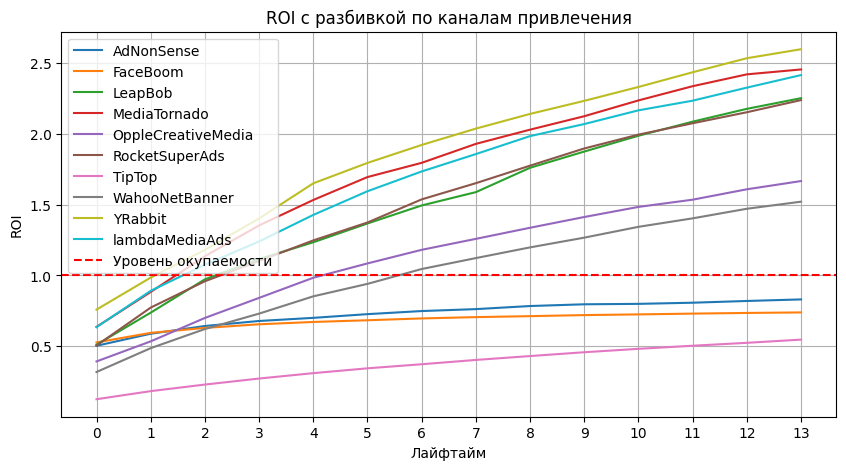

In [65]:
report = roi.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))

plt.title('ROI с разбивкой по каналам привлечения')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

Мы видим, что не все источники окупаются. Проблемы есть у TipTop, FaceBob, AdNonSense. Самые большие проблемы у TipTop, хотя на этот источник уходит 30,7% маркетинговых расходов. TipTop не окупается, поэтому необходимо решать этот вопрос. Но есть и источники, которые окупаются очень хорошо за счёт низких расходов и высокой отдачи. Среди таких - YRabbit, MediaTornado, lambdaMediaAds.

#### Окупается ли реклама, направленная на привлечение пользователей в целом? 
Нет, реклама не окупается, так как самые затратные источники привлчения пользователей не окупаюься. 

#### Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
Устойство - ПК, страны Европы (им нужно уделить дополнительное внимание), рекламные каналы - однозначно TipTop, FaceBob, AdNonSense.

#### Чем могут быть вызваны проблемы окупаемости?
Тем, что компания не диверсифицирует расходы на рекламу и фокусируется на одном рынке - на США. 

### Выводы

#### Откуда приходят пользователи и какими устройствами они пользуются:
Приложение Procrastinate Pro+ используют пользователи из 4-х стран: Франция, Германия, Великобритания и США. Лидирующую долю пользователей составляют пользователи из США - 66,66%, из Великобритании - 11,7%, из Франции = 11,6%, а меньше всего из Германии - 9,98%. \
Если же говорить только о платящях пользователях, то больше всего платящих пользователей приходит из в США - 77,7% всех платящих, из Великобритании 7,88%, из Франции 7,4%, а из Германии 6,9%.
Но для компании важно понимать, насколько много от общего количества привлеченных пользователей из каждой страны становятся платящими пользователями. В США из всех привлеченных пользователей в группу платящих переходят около 7%, в Германии чуть больше 4%, в Великобритании 3,9%, а в Франции меньше всех - 3,7%
#### Что же с используемыми устройствами?
Проведенный анализ показывает, что самое большое количество пользователей пользуется iPhone и Android. То есть если не разбивать пользователей на группы, общая масса переходит с мобильного приложения. То есть в дальнейшем есть смысл фокусироваться на его развитии. \
Если же анализировать доли платящих по устойствам, то меньшая доля приходится на пользователей ПК. Доля платящих пользователей Мас равна 6,3%, доля iPhone равна 6,2%, доля Android равна 5,9%, а у ПК всего 5%.
Сколько стоит привлечение пользователей из различных рекламных каналов
Наибольшая доля платящих пользователей приходится на канал привлечения FaceBoom, на втором месте по доле AdNonSense (но и общее число пользователей меньше), на третьем месте lambdaMediaAds, а на четвертом TipTop. При этом мы видим, что пользователи, которые были привлечены без использования различных каналов (органические) платят наименьшее число раз. \
Доля платящих из канала FaceBoom равна 12%, из канала AdNonSense 11%, из канала lambdaMediaAds равна 10%, из TipTop – 9,6%.
Но такое успешное привлечение пользователей из каналом еще не говорит о том, что расходы по ним будут окупаться. Если определить расходы на каждый источник привлечения, то мы получаем следующее: на канал привлечения TipTop уходит 51% всех средств на рекламу, на канал FaceBoom уходит 31% расходов, на остальные же каналы расходы составляют меньше 5%. Возможно, стоит задумать о целесообразности таких вложений и стоит вкладываться и в другие источники, из которых приходят платящие пользователи. \
Если мы рассмотрим стоимость привлечения клиентов по каналам, то самые дорогие пользователи у TipTop – 2,8, FaceBoom – 1,11, AdNonSense – 1, lambdaMediaAds – 0,72. То есть самые дорогие источники привлекают больше всего клиентов. 
#### Сколько денег приносит каждый клиент
LTV – это выручка, которую компания получает от клиента за все время работы с ним. Сама аббревиатура расшифровывается как Lifetime Value – «пожизненная ценность клиента». Таким образом, чем она выше - тем лучше для нас. Самые высокие показатели у AdNonSense, TipTop, FaceBoom, RocketSuperAds, WahooNetBanner. Но высокая выручка еще не говорит о том, окупается ли источник и хорошо ли это. Быть может те клиенты, которые приносят высокую выручку, имеют высокие затраты на привлечение.
На 14 неделе LTV у lambdaMediaAds равно 1,75, у TipTop равно 1,49, у RocketSuperAds равно 0,94, а у  WahooNetBanner равно 0.91. Меньше всего приносят пользователи привлеченные из OppleCreativeMedia – 0,41 и из LeapBob – 0,47.
#### Когда расходы на привлечение клиента окупаются
Расходы на клиента будут окупаться, если стоимость привлечения меньше, чем сумма денег, которые принесли клиенты. Таким образом, нужно найти отношение привлеченных средств или LTV к расходам на пользователя, то есть CAC. Находим окупаемость рекламы ROI и на основе этого можно сделать вывод, что не окупаются такие источники как TipTop, FaceBob, AdNonSense. Самые большие проблемы у TipTop, хотя на этот источник уходит 30,7% маркетинговых расходов. TipTop не окупается, поэтому необходимо решать этот вопрос. Но есть и источники, которые окупаются очень хорошо за счёт низких расходов и высокой отдачи. Среди таких - YRabbit, MediaTornado, lambdaMediaAds.
#### Какие факторы мешают привлечению клиентов.
Уже на первом шаге исследования стало понятно, что компания фокусируется на рынок США и оттуда идет основной поток клиентов. Но возможно надо развивать присутствие и на других рынках. Также есть большой перекос в привлечение пользователей по источникам. Чем больше средств мы тратим на каждый источник, тем со временем больше вероятность, что именно он и начнет проседать. Необходимо исследовать и другие источники – так сказать диверсифицировать свои рекламные расходы.


### Рекомендации для отдела маркетинга 

Во-первых, надо срочно пересмотреть рекламные кампании и источники, которые используются. Так как были определены значения окупаемости (ROI) по каждому источнику, то стоит как раз выбрать те, что окупаются - а таких достаточно много. Причем некоторые окупаются в первые 4 недели - например YRabbit, MediaTornado, lambdaMediaAds.\
Во-вторых, нужно либо адаптировать приложение для ПК, либо направить усилия на привлечение пользователей только с мобильных устройств, потому что это самый перспективный источник для компании. \
В-третьих, важно балансировать расходы на маркетинг во времени, чтобы не было такого, что в какой-то месяц расходы проседают, а в какой-то являются очень большими. \
В-четвёртых, важно разобраться с присутствием в других странах. Возможно, продвижение рекламы там неэффективно из-за того, что она неадаптирована под пользователей и важно использовать те источники продвижения, которые пользуются популярностью в той или иной стране. 